In [9]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import sys
import os

## Enter path to your `Diagnostics.nc` file:

In [46]:
# hpc parallel
root_dir = "/home/cchristo/clima/CalibrateEDMF.jl/experiments/scm_pycles_pipeline/hpc_parallel" # CEDMF copy 
ekp_res_path = os.path.join(root_dir, "completed/results_Inversion_dt1.0_p16_e100_i100_d27_LES_85635", "Diagnostics.nc")


# Plot Ensemble Diagnostics
### Plot ensemble mean of parameter $\phi_i$ as a function of iteration number

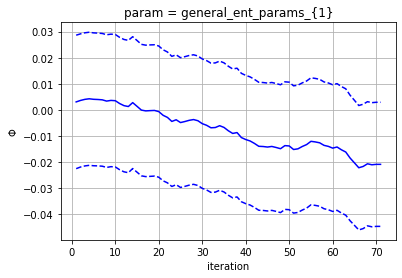

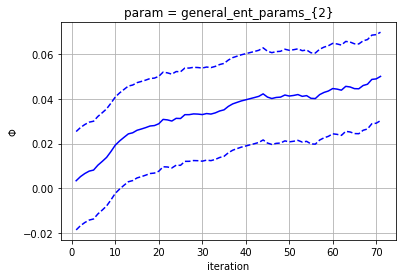

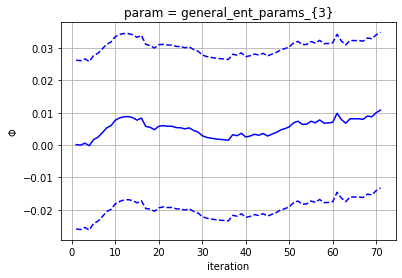

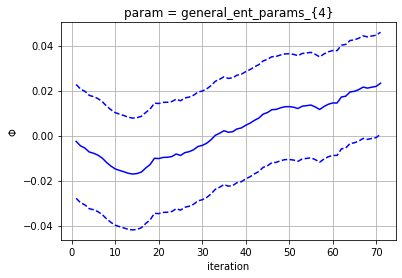

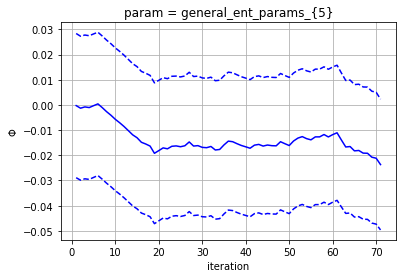

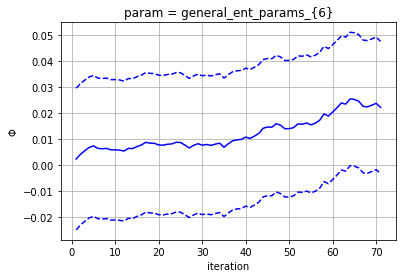

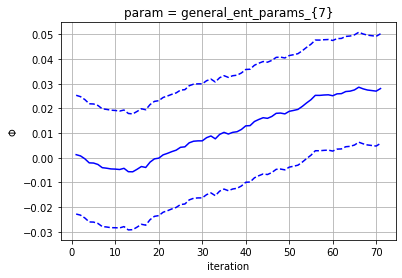

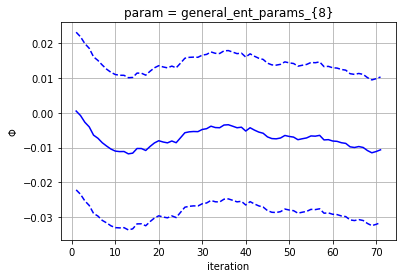

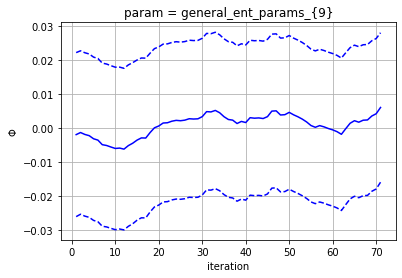

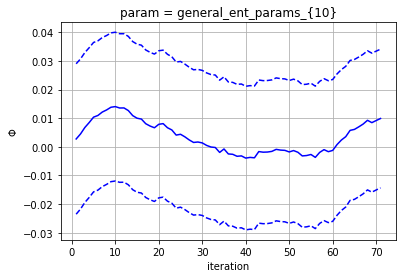

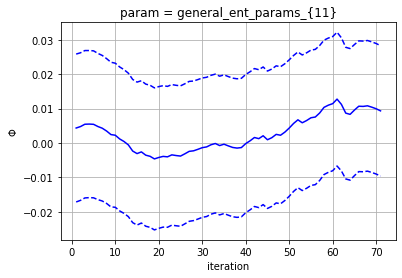

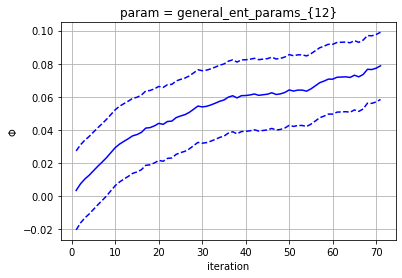

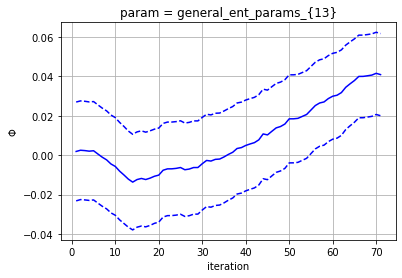

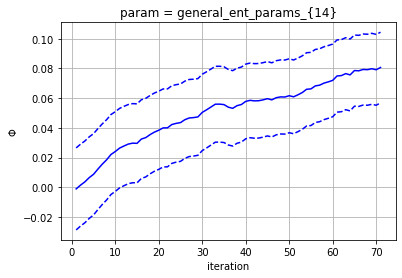

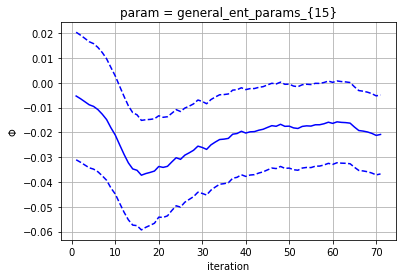

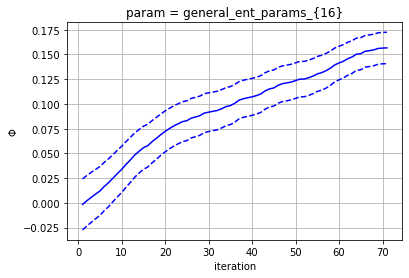

In [54]:
ds = xr.open_dataset(ekp_res_path, group = "ensemble_diags")
# remove last iteration 
ds = ds.sel(iteration = slice(1, ds["iteration"].max().item() - 1))

for param_i in range(len(ds.param)):
    plt.figure()
    ds.phi_mean.isel(param = param_i).plot(color = 'b',)
    ds.phi_low_unc.isel(param = param_i).plot(color = 'b', linestyle = '--')
    ds.phi_upp_unc.isel(param = param_i).plot(color = 'b', linestyle = '--')
    plt.ylabel('$\Phi$')
    plt.grid()


In [55]:
# Print optimal parameters (mean parameter value at last iteration)
optimal_params = []
for param_i in range(len(ds.param)):
    optimal_params.append(np.round(ds.phi_mean.isel(param = param_i)[-1].item(), 7))
    
optimal_params

[-0.0208292,
 0.0499533,
 0.0108131,
 0.0233033,
 -0.0236873,
 0.0221699,
 0.028032,
 -0.0106434,
 0.0060657,
 0.0099015,
 0.0093199,
 0.0787551,
 0.0408527,
 0.0806655,
 -0.0208606,
 0.1566381]

# Plot Particle Diagnostics
## RMSE for each particle in each iteration 

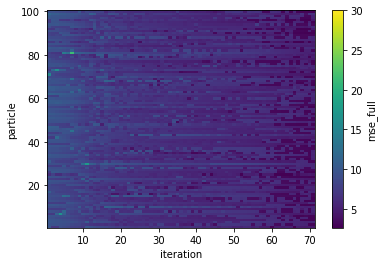

In [49]:
ds = xr.open_dataset(ekp_res_path, group = "particle_diags")
# remove last iteration 
ds = ds.sel(iteration = slice(1, ds["iteration"].max().item() - 1))

# Plot RMSE
ds.mse_full.T.plot(vmax = 30)


# Plot Metrics
## Plot mean, max, and min RMSE across ensemble members

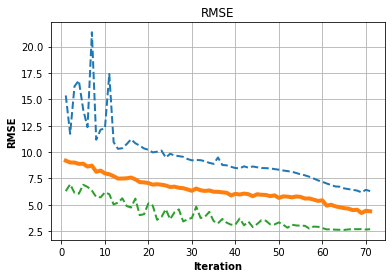

In [52]:
ds = xr.open_dataset(ekp_res_path, group = "metrics")
# remove last iteration 
ds = ds.sel(iteration = slice(1, ds["iteration"].max().item() - 1))

ds.mse_full_max.plot(linewidth = 2, linestyle = '--')
ds.mse_full_mean.plot(linewidth = 4)
ds.mse_full_min.plot(linewidth = 2, linestyle = '--')

plt.title("RMSE")
plt.ylabel('RMSE', weight = 'bold')
plt.xlabel('Iteration', weight = 'bold')
plt.grid()